In [1]:
import numpy as np
import gdal
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#merged slope raster, accumulation area raster, and watershed raster into one three band raster.
# exported this raster into a text file from OSGeo4W command line:
# gdal2xyz input.tif -band 1 -band 2 -band 3 output.txt. This is a slow operation... 

#Dry = 4
#Hank = 3
#Elder = 1
#Fox = 2

In [2]:

#READ IN DATA FROM CSV
#slope_perc_elder = np.genfromtxt('data/Elder_Points_ELEV_SLOPE_AREA_CURV_COORDS.csv',usecols=(3),delimiter=',',dtype=None, skiprows=1)



In [3]:
ds = gdal.Open('..\..\GIS\LIDAR\merge2.tif')
#Band 1 = slope
#Band 2 = watershed
# Band 3 = upslope contributing area

In [4]:
band1 = ds.GetRasterBand(1)
band2 = ds.GetRasterBand(2)
band3 = ds.GetRasterBand(3)

In [5]:
array1 = band1.ReadAsArray()
array2 = band2.ReadAsArray()
array3 = band3.ReadAsArray()

In [6]:
array1.min()

-32768

In [50]:
elderSlope = array1[array2 == 1].flatten()
elderArea = array3[array2 == 1].flatten()
#elderArea = elderArea[elderArea != -32768]
#foxSlope = array1[array2 == 2].flatten()
#foxArea = array3[array2 == 2].flatten()
#hankSlope = array1[array2 == 3].flatten()
#hankArea = array3[array2 == 3].flatten()
#drySlope = array1[array2 == 4].flatten()
#dryArea = array3[array2 == 4].flatten()

In [8]:
#df = pd.DataFrame([elderSlope, elderArea, foxSlope, foxArea, hankSl
hello = elderArea + 1
print len(elderArea)
print len(hello)


16969309
16969309


In [51]:
# 

0

In [52]:
#GENERATE LOGARITHMIC BIN SPACING
numBins = 20
elderArea = elderArea + 1
area_bins_elder = np.logspace(np.log10(min(elderArea)), np.log10(max(elderArea)), numBins)
print area_bins_elder

[            nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan  32766.99759928]


-32768

In [16]:
#Return the indices_elder of the bins to which each value in input array belongs.
indices_elder = np.digitize(elderArea, area_bins_elder)



In [17]:
#COMPUTE MEAN, MEDIAN AND STANDARD DEVIATION OF SLOPE IN EACH AREA BIN
bin_means_elder = [elderSlope[indices_elder == i].mean() for i in range(1, len(area_bins_elder))]
bin_medians_elder = [np.median(elderSlope[indices_elder == i]) for i in range(1, len(area_bins_elder))]
bin_stds_elder = [elderSlope[indices_elder == i].std() for i in range(1, len(area_bins_elder))]




C:\Users\wjh\Anaconda\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
C:\Users\wjh\Anaconda\lib\site-packages\numpy\core\_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)


C:\Users\wjh\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:2651: MatplotlibDeprecationWarning: Use of None object as fmt keyword argument to suppress plotting of data values is deprecated since 1.4; use the string "none" instead.
  warnings.warn(msg, mplDeprecation, stacklevel=1)
C:\Users\wjh\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


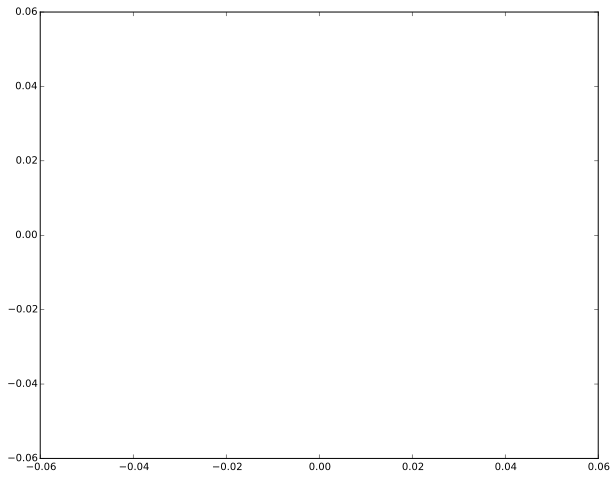

In [18]:
# Create a figure
plt.figure(figsize=(10,8))

# Create a scatterplot of,
            # attacker size in year 298 as the x axis
plt.scatter(.5*(area_bins_elder[1:]+area_bins_elder[:-1]),bin_means_elder, marker = "o", color = 'r')
plt.errorbar(.5*(area_bins_elder[1:]+area_bins_elder[:-1]),bin_means_elder, yerr=bin_stds_elder, fmt = None, capthick=0, ecolor = 'r')

#plt.yscale('log')
#plt.xscale('log')
plt.show()